# Problem:

### Attrition Data Challenge  BBVA
##### Author: Cesar Gustavo Seminario Calle

Se desea saber que tan probable es que los clientes de una entidad financiera dejen de usar sus productos o servicios (attrition). Para esto se tiene un Dataset con información relacionada al comportamiento de los clientes teniendo en cuenta un mes de referencia y un indicador de attrition.

El campo attrition se categoriza en:

+ **Attrition (1)**

+ **No es attrition (0)**



#### Descripcion de las Variables
* ID CORRELATIVO ->

* COD MES -> Mes de referencia **201208**
* FLG_BANCARIZADO -> Si el cliente esta bancarizado o no
* RANG INGRESO -> 01 -06 menor numero significa menor ingreso
* FLG_LIMA_PROVIN -> Si vive en Lima o en provincia( Existen muchos NA'S)
* EDAD -> Edad del cliente 18 -98
* ANTIGUEDAD -> Años de antiguedad
* ATTRITION -> TARGET Desercion de Clientes
* RANGO_SDO -> Rango de ahorros 01 Menor - 06 Mayor
* SDO_ACTIVO -> Saldo activo, de los ultimos 6 meses
* FLG_SEGURO -> Tiene seguro o no durante los ultimos 6 meses.
* NRO_PRODUCTOS ->Rango de productos,01 menor a 06 Mayor
* FLG_NOMINA->Si pertenece a la nomina o no.
* NRO_ACCES_CANAL1 -> N° de operaciones en canal 1 de atencion en los ultimos 
* NRO_ACCES_CANAL2 -> N° de operaciones en canal 2 de atencion en los ultimos 
* NRO_ACCES_CANAL3 -> N° de operaciones en canal 3 de atencion en los ultimos
* NRO_ENTID_SSFF -> N° de entidades financieras en el sistema financiero
* FLG_SDO_OTSSFF -> Flag tiene saldo en otras entidades del sistema financiero: tiene saldo (1), no tiene saldo (0)

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

In [168]:
train_clientes=pd.read_excel("C:/Users/GIDEON/Desktop/Cursos/Hackathoneando/BBVA DATA CHALLENGE/train_clientes.xlsx", na_values='NaN',index_col=0)
trest_clientes=pd.read_excel("C:/Users/GIDEON/Desktop/Cursos/Hackathoneando/BBVA DATA CHALLENGE/test_clientes.xlsx",na_values='NaN', index_col=0)
train_clientes.head(6)

,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
ID_CORRELATIVO,,,,,,,,,,,,,,,,,,,,,
35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,0,Rango_SDO_09,0,0,...,1,1,1,1,1,0,0,0,0,0
66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,0,Rango_SDO_01,0,0,...,1,1,1,1,0,0,0,0,0,0
56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,0,Rango_SDO_02,0,0,...,0,0,0,0,0,0,0,0,0,0
8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,0,Rango_SDO_03,0,0,...,3,3,3,3,1,1,1,1,1,1
6853,201208,1,NaN,Lima,25.0,0.0,0,Rango_SDO_01,0,0,...,0,0,0,0,0,0,0,0,0,0
22240,201208,0,Rang_ingreso_02,Lima,27.0,0.0,0,Rango_SDO_01,0,0,...,0,0,0,0,0,0,0,0,0,0


## Variables:

In [67]:
train_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 35653 to 34991
Data columns (total 52 columns):
CODMES                       70000 non-null int64
FLG_BANCARIZADO              70000 non-null int64
RANG_INGRESO                 60583 non-null object
FLAG_LIMA_PROVINCIA          66614 non-null object
EDAD                         64674 non-null float64
ANTIGUEDAD                   68238 non-null float64
ATTRITION                    70000 non-null int64
RANG_SDO_PASIVO_MENOS0       70000 non-null object
SDO_ACTIVO_MENOS0            70000 non-null int64
SDO_ACTIVO_MENOS1            70000 non-null int64
SDO_ACTIVO_MENOS2            70000 non-null int64
SDO_ACTIVO_MENOS3            70000 non-null int64
SDO_ACTIVO_MENOS4            70000 non-null int64
SDO_ACTIVO_MENOS5            70000 non-null int64
FLG_SEGURO_MENOS0            70000 non-null int64
FLG_SEGURO_MENOS1            70000 non-null int64
FLG_SEGURO_MENOS2            70000 non-null int64
FLG_SEGURO_MENOS3            7

## Exploring Data Analysis

In [68]:
import seaborn as sns
import matplotlib.pyplot  as plt

**Rang_Ingreso VS Antiguedad**

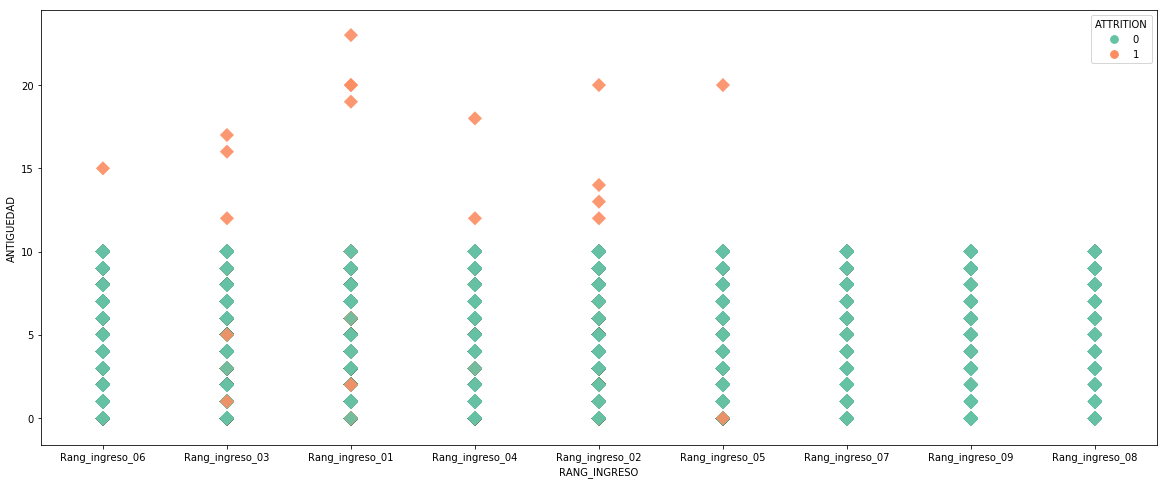

In [69]:

%matplotlib inline
plt.figure(figsize=(20,8))
ax =sns.stripplot("RANG_INGRESO","ANTIGUEDAD","ATTRITION", data=train_clientes,
                  marker="D",palette="Set2",
                  edgecolor="gray",
                  alpha=.9,size=10);

La concentracion de clientes que desiertan esta entre los rangos de ingresos menores de *01 - 03*, cuya **antiguedad** es mayor a **10** años. 

**RANG_INGRESO VS FLG_BANCARIZADO**

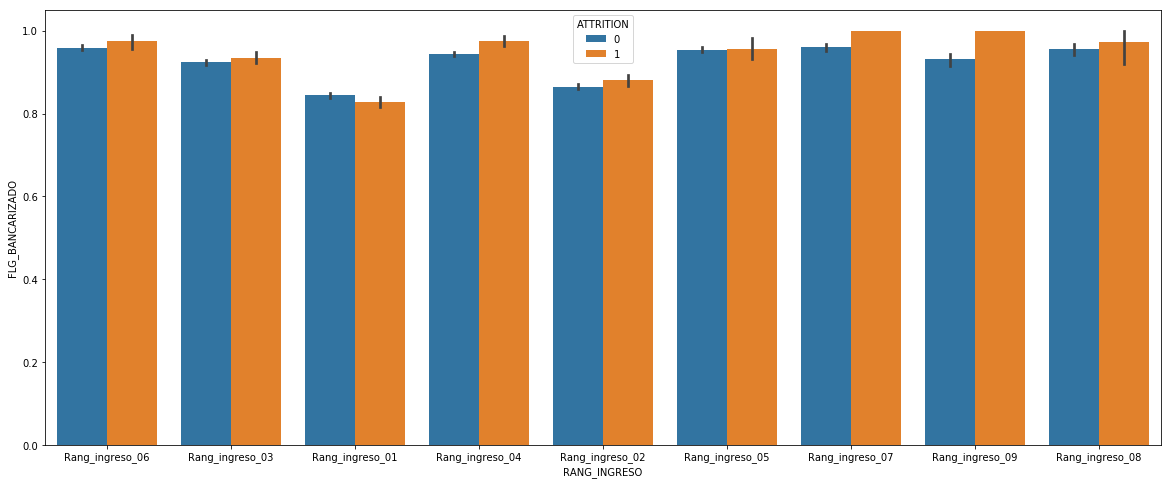

In [70]:
plt.figure(figsize=(20,8))
sns.barplot(x="RANG_INGRESO", y="FLG_BANCARIZADO", hue="ATTRITION", data=train_clientes);

* Entre el Rango de Ingreso y Flag de Clientes bancarizado, agrupado por el atributo Attrition.

**Attrition Count**

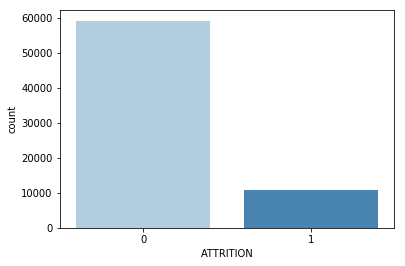

In [71]:
sns.countplot(x="ATTRITION", data=train_clientes, palette="Blues");

In [72]:
train_clientes.ATTRITION.value_counts()

0    59178
1    10822
Name: ATTRITION, dtype: int64

Observamos que la proporción del target es mayoritaria para la clase negativa, una de las acciones que se pueden tomar es rebalancear el target. Pues se desea predecir quienes que clientes van a desertar.

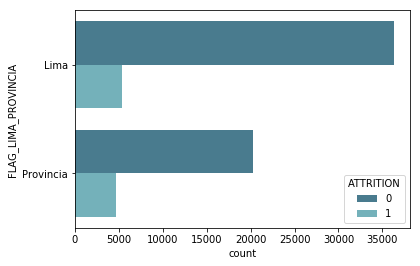

In [73]:
sns.countplot(y="FLAG_LIMA_PROVINCIA", hue="ATTRITION", data=train_clientes, palette="GnBu_d")

La deserción presenta el mismo patron, tanto en **Lima** como en **Provincia** 

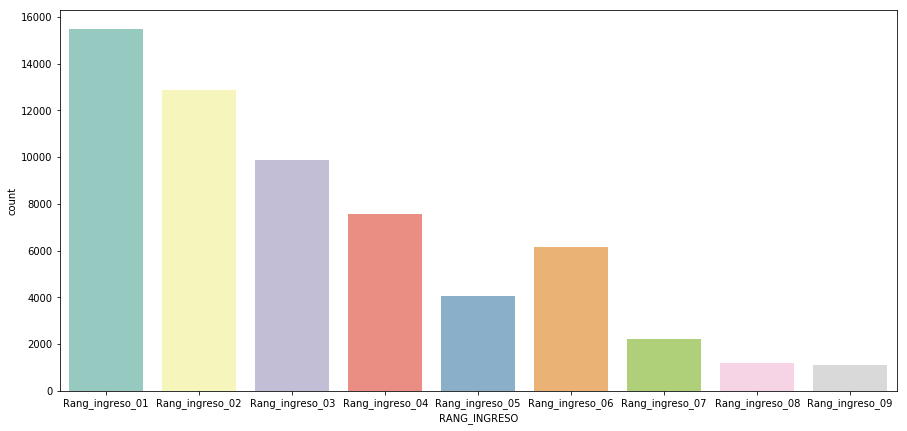

In [74]:
plt.figure(figsize=(15,7))
sns.countplot(x="RANG_INGRESO", data=train_clientes, palette="Set3",order=["Rang_ingreso_01","Rang_ingreso_02",
                                                                            "Rang_ingreso_03","Rang_ingreso_04",
                                                                            "Rang_ingreso_05","Rang_ingreso_06",
                                                                            "Rang_ingreso_07","Rang_ingreso_08",
                                                                            "Rang_ingreso_09",]);

+ La mayoria de clientes posee bajos ingresos menores, o categorizados como bajos.

**Antiguedad Count**

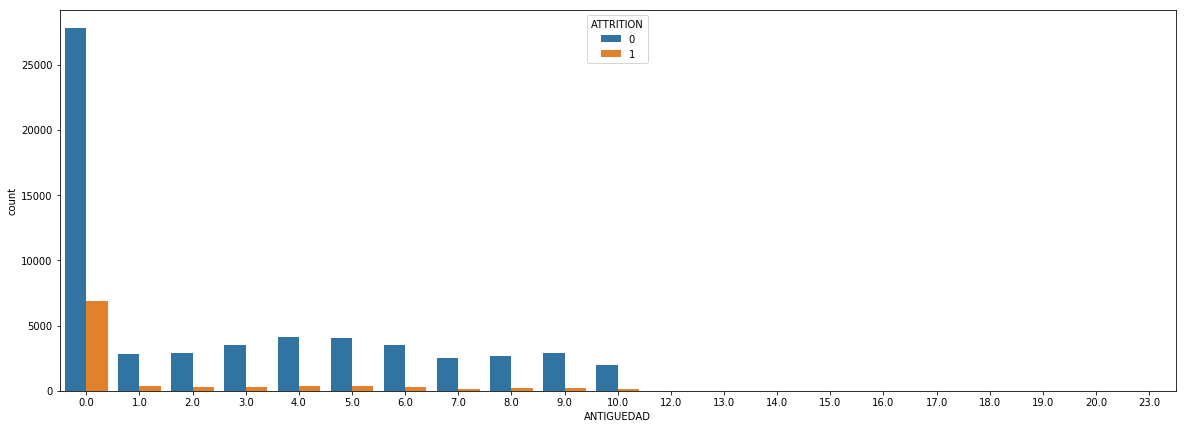

In [75]:
plt.figure(figsize=(20,7))
sns.countplot(x="ANTIGUEDAD", data=train_clientes, hue="ATTRITION");

La mayoria de clientes no tienen mas de un año en el banco.

#### Test Statistics

In [76]:
ct1=pd.crosstab(train_clientes["FLG_BANCARIZADO"], train_clientes["ATTRITION"])
ct1

ATTRITION,0,1
FLG_BANCARIZADO,,
0,8996,2271
1,50182,8551


In [77]:
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

ATTRITION               0        1
FLG_BANCARIZADO                   
0                0.152016  0.20985
1                0.847984  0.79015


In [14]:
import scipy.stats

scipy.stats.chi2_contingency(ct1)


(226.16529659279203,
 4.0893798141544121e-51,
 1,
 array([[  9525.1218,   1741.8782],
        [ 49652.8782,   9080.1218]]))

**Interpretacion de Test**
* el valor de la prueba es bastante alto 226.1652 y el p value es 4.08-51 un valor bastante pequeño, 

#### PreProcessing

* RANG_INGRESO                 60583 non-null object -> 9417 missings values
* FLAG_LIMA_PROVINCIA          66614 non-null object -> 3386 missings values
* EDAD                         64674 non-null float64 -> 5326 missings values
* ANTIGUEDAD                   68238 non-null float64 -> 1762 missings values

In [169]:
train_clientes.info(null_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 35653 to 34991
Data columns (total 52 columns):
CODMES                       70000 non-null int64
FLG_BANCARIZADO              70000 non-null int64
RANG_INGRESO                 60583 non-null object
FLAG_LIMA_PROVINCIA          66614 non-null object
EDAD                         64674 non-null float64
ANTIGUEDAD                   68238 non-null float64
ATTRITION                    70000 non-null int64
RANG_SDO_PASIVO_MENOS0       70000 non-null object
SDO_ACTIVO_MENOS0            70000 non-null int64
SDO_ACTIVO_MENOS1            70000 non-null int64
SDO_ACTIVO_MENOS2            70000 non-null int64
SDO_ACTIVO_MENOS3            70000 non-null int64
SDO_ACTIVO_MENOS4            70000 non-null int64
SDO_ACTIVO_MENOS5            70000 non-null int64
FLG_SEGURO_MENOS0            70000 non-null int64
FLG_SEGURO_MENOS1            70000 non-null int64
FLG_SEGURO_MENOS2            70000 non-null int64
FLG_SEGURO_MENOS3            7

* RANG_INGRESO                 60559 non-null object -> Estimacion en base a algo xd
* FLAG_LIMA_PROVINCIA          66581 non-null object -> Estimacion 
* EDAD                         64673 non-null float64 -> Mediana
* ANTIGUEDAD                   66575 non-null float64 -> Mediana

In [249]:
from sklearn.pipeline import Pipeline

#Categoric to numeric
dealer1=DealMissingValues(labelColumn="RANG_INGRESO",clases=["Rang_ingreso_01","Rang_ingreso_02", "Rang_ingreso_03","Rang_ingreso_04","Rang_ingreso_05","Rang_ingreso_06","Rang_ingreso_07","Rang_ingreso_08","Rang_ingreso_09"])
dealer2=DealMissingValues(labelColumn="FLAG_LIMA_PROVINCIA",clases=["Lima","Provincia"])
dealer3=DealMissingValues(labelColumn="RANG_SDO_PASIVO_MENOS0",clases=["Cero","Rango_SDO_01","Rango_SDO_02", "Rango_SDO_03","Rango_SDO_04","Rango_SDO_05","Rango_SDO_06","Rango_SDO_07","Rango_SDO_08","Rango_SDO_09","Rango_SDO_10","Rango_SDO_11","Rango_SDO_12","Rango_SDO_13","Rango_SDO_14"])
dealer4=DealMissingValues(labelColumn="RANG_NRO_PRODUCTOS_MENOS0",clases=["Rango_01","Rango_02","Rango_03","Rango_04","Rango_05","Rango_06"])

                                                                       #Imputation
imput_mode=ImputerDataframe(['RANG_INGRESO','FLAG_LIMA_PROVINCIA'],strategy="most_frequent")
imput_median=ImputerDataframe(['EDAD','ANTIGUEDAD'],strategy="median")


pipelines_clientes = Pipeline([('RANG_INGRESO',dealer1),
                             ('FLAG_LIMA_PROVINCIA',dealer2),
                             ('RANG_SDO_PASIVO_MENOS0',dealer3),
                             ('RANG_NRO_PRODUCTOS_MENOS0',dealer4),
                             ('IMP_CAT',imput_mode),
                             ('IMP_NUM',imput_median)])

data_train_clientes = pipelines_clientes.fit_transform(train_clientes)

In [250]:
#Data Imputation

data_train_clientes.head()

,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
ID_CORRELATIVO,,,,,,,,,,,,,,,,,,,,,
35653,201208,1,5.0,0.0,25.0,6.0,0,9,0,0,...,1,1,1,1,1,0,0,0,0,0
66575,201208,1,2.0,1.0,27.0,0.0,0,1,0,0,...,1,1,1,1,0,0,0,0,0,0
56800,201208,1,0.0,1.0,34.0,4.0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
8410,201208,1,3.0,1.0,63.0,5.0,0,3,0,0,...,3,3,3,3,1,1,1,1,1,1
6853,201208,1,0.0,0.0,25.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
#from sklearn.pipeline import Pipeline
#from sklearn.linear_model import ElasticNet


train_x_dataframe=data_train_clientes.drop("ATTRITION",axis=1)
X_train = train_x_dataframe.values
y_train = data_train_clientes.ATTRITION.values

In [252]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators =20,criterion ='gini',bootstrap =True)

rf_model.fit(X_train,y_train)
rf_model.feature_importances_

array([ 0.        ,  0.00727767,  0.05693095,  0.01889463,  0.12483521,
        0.0349724 ,  0.08656169,  0.01595687,  0.01042005,  0.00850509,
        0.00636103,  0.00705253,  0.00696886,  0.00870658,  0.00816334,
        0.01081355,  0.00439103,  0.00579694,  0.00887442,  0.0267694 ,
        0.01545014,  0.01785366,  0.01235364,  0.00858486,  0.00620528,
        0.00535999,  0.00548808,  0.01682251,  0.01245311,  0.00759789,
        0.00547492,  0.00417571,  0.00405254,  0.072755  ,  0.06678905,
        0.04545229,  0.03549775,  0.0207548 ,  0.01722556,  0.0233948 ,
        0.02214085,  0.01888948,  0.01627711,  0.01896211,  0.02172675,
        0.00950304,  0.00801805,  0.00648825,  0.00487909,  0.00466377,
        0.00645768])

#### Response

In [253]:
data_test = pipelines_clientes.transform(trest_clientes)
data_test.head()


,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
ID_CORRELATIVO,,,,,,,,,,,,,,,,,,,,,
47411,201208,0,2.0,0.0,32.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39861,201208,1,2.0,1.0,37.0,0.0,1,0,0,0,...,2,2,2,2,0,0,0,0,0,1
38898,201208,1,3.0,0.0,26.0,4.0,4,0,0,0,...,3,3,3,3,1,1,1,1,1,1
50927,201208,1,1.0,0.0,34.0,4.0,7,0,0,0,...,1,1,0,0,0,0,0,0,0,0
32969,201208,1,2.0,0.0,22.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
X_test=data_test.values
y_predict=rf_model.predict(X_test)

In [271]:
data_submit=pd.DataFrame(y_predict,columns=["ATTRITION"],index=data_test.index)
data_submit.to_csv("submit1.csv",encoding="utf-8")

In [264]:
y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
test.Cat